<a href="https://colab.research.google.com/github/Shivamg27071999/Data-Analytics-DS-Projects/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# configure kaggle

In [2]:
 !pip install -q kaggle

In [6]:
pip install kaggle

In [8]:
!kaggle competitions download -c titanic

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [9]:

from google.colab import files
files.upload()  # Upload the 'kaggle.json' file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivamgarg8783","key":"252b9bd92a7c1b21a7dd763487fffa3b"}'}

In [10]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!pip install kaggle

In [12]:
!kaggle competitions list


ref                                                                                     deadline             category                reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/arc-prize-2024                                      2024-11-10 23:59:00  Featured         1,100,000 Usd       1080           False  
https://www.kaggle.com/competitions/child-mind-institute-problematic-internet-use       2024-12-19 23:59:00  Featured            60,000 Usd        673            True  
https://www.kaggle.com/competitions/eedi-mining-misconceptions-in-mathematics           2024-12-12 23:59:00  Featured            55,000 Usd        520           False  
https://www.kaggle.com/competitions/rsna-2024-lumbar-spine-degenerative-classification  2024-10-08 23:59:00  Featured            50,000 Usd       1799     

In [13]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 49.2MB/s]


# EDA

In [15]:
# Unzip the dataset
!unzip titanic.zip

# Import pandas and load the dataset into a DataFrame
import pandas as pd

# Load training data
train_df = pd.read_csv('train.csv')
print(train_df.head())

# Load test data
test_df = pd.read_csv('test.csv')
print(test_df.head())


Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 310128

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set style for seaborn
sns.set(style="whitegrid")

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


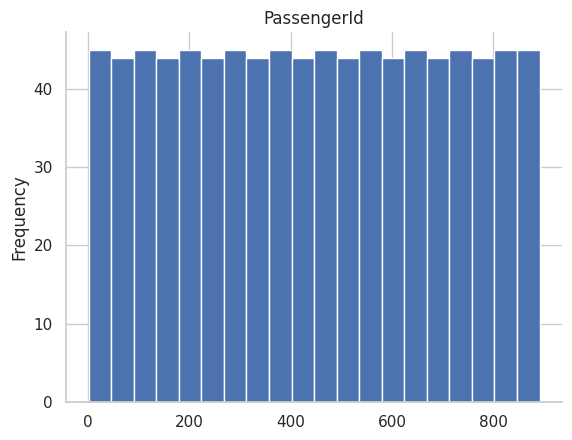

In [20]:
# @title PassengerId

from matplotlib import pyplot as plt
train_df['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=train_df)

https://docs.google.com/spreadsheets/d/1nyiPlQwT9TguAWEdIrQdA3DSXyMoxDoeOR49ZyPWWos#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


- PassengerId: A unique identifier for each passenger.
- Survived: Indicates whether the passenger survived (1) or died (0).
- Pclass: Passenger class (1st, 2nd, or 3rd).
- Name: Passenger's name.
- Sex: Passenger's gender (male or female).
- Age: Passenger's age.
- SibSp: Number of siblings or spouses aboard.  
- Parch: Number of parents or children aboard.
- Ticket: Ticket number.
- Fare: Passenger's fare.
- Cabin: Cabin number (if available).
- Embarked: Port of embarkation (S = Southampton, C = Cherbourg, Q = Queenstown).

In [19]:
# Check the structure and info of the dataset
train_df.info()

# Check for missing values
train_df.isnull().sum()

# Summary statistics
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- PassengerId: The minimum and maximum values are 1 and 891, respectively, indicating that there are 891 passengers in the dataset.
- Survived: The mean is 0.383838, suggesting that approximately 38% of passengers survived.
- Pclass: The mean is 2.308642, indicating that the majority of passengers were in the 3rd class.
- Age: The mean age is 29.699118, with a standard deviation of 14.526497. This suggests that the ages are relatively evenly distributed around the mean, with some variation.
- SibSp: The mean is 0.523008, indicating that most passengers were not traveling with siblings or spouses.
- Parch: The mean is 0.381594, suggesting that most passengers were not traveling with parents or children.
- Fare: The mean fare is 32.204208, with a standard deviation of 49.693429. This indicates that there is a wide range of fares, with some passengers paying significantly more than others

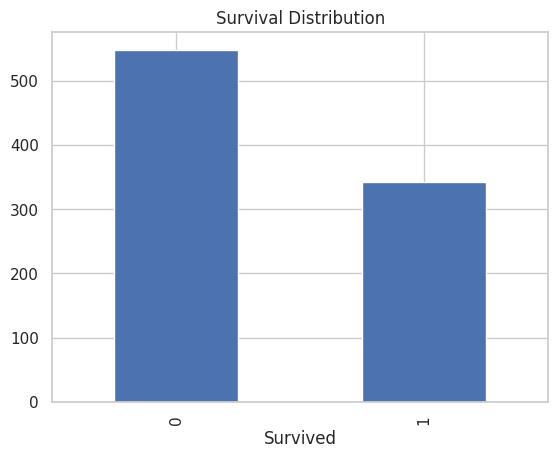

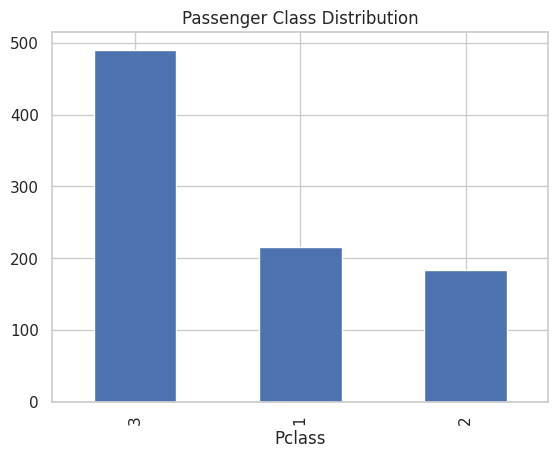

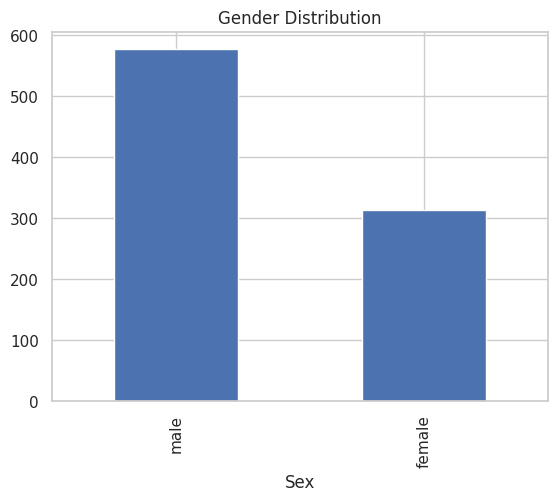

In [21]:
# Distribution of target variable 'Survived'
train_df['Survived'].value_counts().plot(kind='bar', title='Survival Distribution')
plt.show()

# Distribution of 'Pclass' (Passenger Class)
train_df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class Distribution')
plt.show()

# Distribution of 'Sex'
train_df['Sex'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()

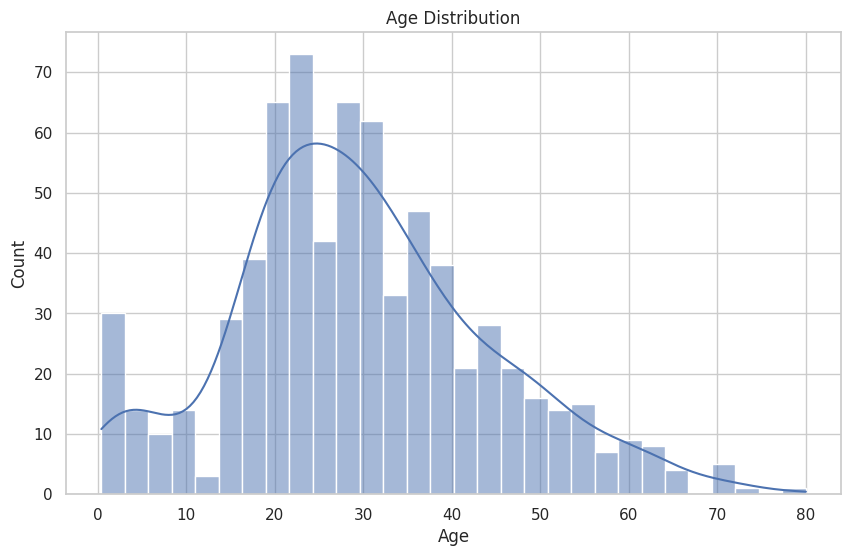

In [22]:
# Age distribution plot
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

- Skewness: The distribution is right-skewed, meaning there is a longer tail to the right. This indicates that there are some older individuals in the group.
- Peak: The peak of the distribution is around 25-30 years old, suggesting that this age range is the most common in the group.
- Range: The ages in the group range from approximately 0 to 80 years old.
- Mode: There is a clear mode (most frequent age) around 25-30 years old.
- Median: The median age (the middle value when the data is sorted) appears to be around 30-35 years old, based on the shape of the distribution.
- Distribution: The overall shape of the distribution is somewhat bell-shaped, similar to a normal distribution, but with a longer right tail

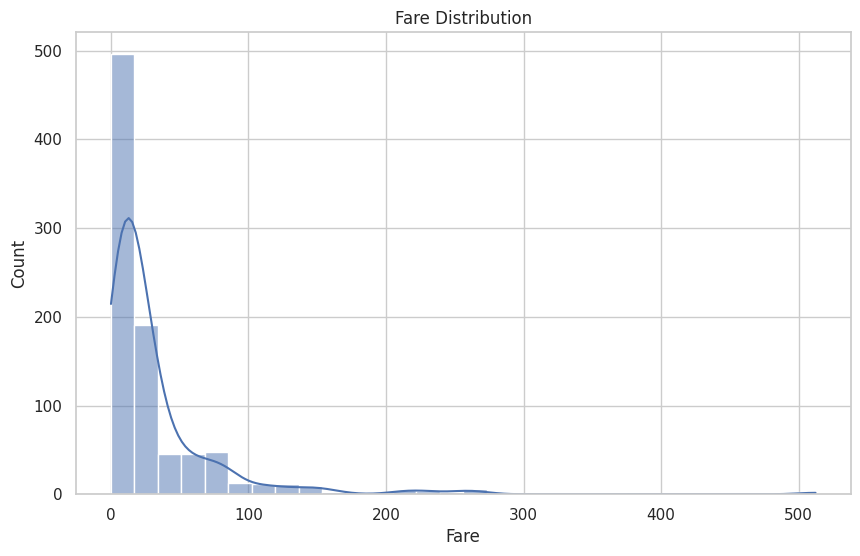

In [23]:
# Fare distribution plot
plt.figure(figsize=(10,6))
sns.histplot(train_df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()

- Skewness:
The distribution is heavily right-skewed, meaning there is a long tail to the right. This indicates that there are a few individuals who paid significantly higher fares than the majority.
- Peak: The peak of the distribution is around 0-25, suggesting that the most common fare range is between 0 and 25.
- Range: The fares range from 0 to around 500.
- Mode: There is a clear mode (most frequent fare) around 0-25.
- Median: The median fare (the middle value when the data is sorted) appears to be around 10-20, based on the shape of the distribution.
- Distribution: The overall shape of the distribution is highly skewed to the right, with a long tail extending to the right.

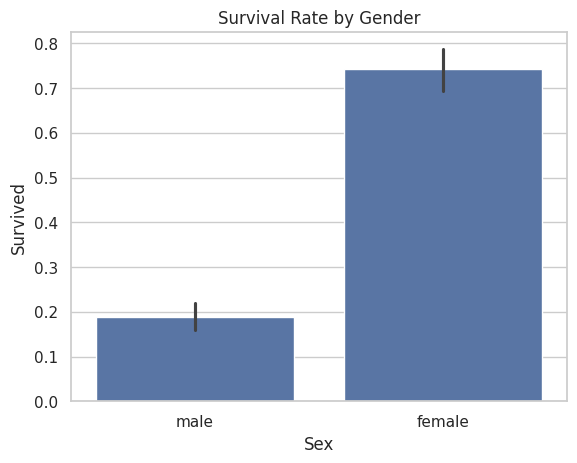

In [24]:
# Survival rate based on gender
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()

- Female Survival: Female individuals have a significantly higher survival rate compared to male individuals.
- Male Survival: Male individuals have a lower survival rate compared to female individuals.

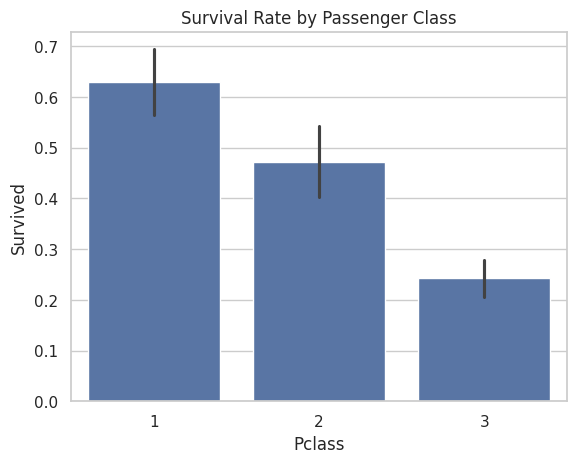

In [25]:
# Survival rate based on Pclass
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()


- Class 1 Survival: Individuals in class 1 have the highest survival rate.
- Class 3 Survival: Individuals in class 3 have the lowest survival rate.
- Class 2 Survival: Individuals in class 2 have a survival rate between class 1 and class 3
** reason for survival class wise
- Prioritization: First-class passengers were likely given priority in rescue efforts due to their higher social status and the associated fees they paid.
- Location: First-class cabins were often located on the upper decks of the ship, which may have provided easier access to lifeboats in the event of an emergency.
- Resources: First-class passengers may have had access to more resources, such as personal belongings or money, that could have aided in their survival.

<ipython-input-26-742b49ae8eab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


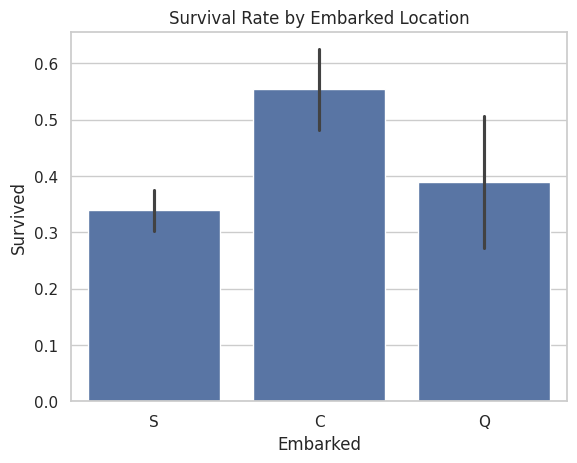

In [26]:
# Fill missing Embarked values (optional)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Survival rate by Embarked location
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.title('Survival Rate by Embarked Location')
plt.show()


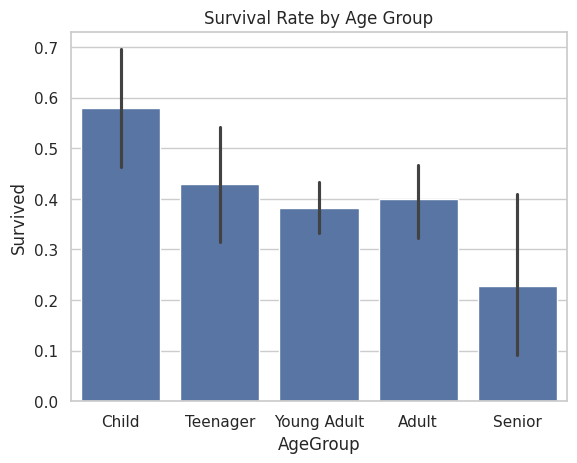

In [27]:
# Create age bins and analyze survival rate
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 35, 60, 120], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

# Plot survival rate by age group
sns.barplot(x='AgeGroup', y='Survived', data=train_df)
plt.title('Survival Rate by Age Group')
plt.show()


    - Child Survival: Children have the highest survival rate, followed by teenagers.
    - Senior Survival: Seniors have the lowest survival rate.
    - Adult Survival: Young adults and adults have similar survival rates, which are lower than children but higher than seniors.

* age group was a significant factor in determining survival in this group. It suggests that children were more likely to survive than adults and seniors.

* There are several possible reasons for this:

    - Prioritization: Children were likely given priority in rescue efforts due to their vulnerability and the belief that they had a greater chance of survival.
    - Size: Children are generally smaller than adults, which may have made it easier for them to fit into lifeboats or to be rescued by others.
    - Dependency: Children are often dependent on adults for their care, which may have led to them being placed in lifeboats with their families

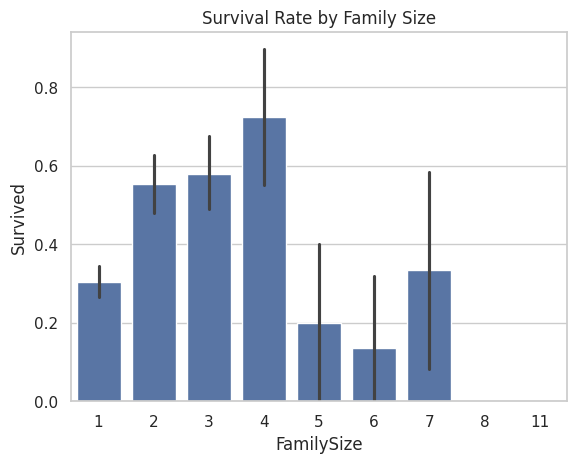

In [28]:
# Create a new feature 'FamilySize'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Survival rate by family size
sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title('Survival Rate by Family Size')
plt.show()



- Small Family Size: Individuals with a family size of 1, 2, or 3 have the highest survival rates.
- Large Family Size: Individuals with a family size of 4, 5, 6, 7, 8, or 11 have lower survival rates.
- Family Size of 4: Individuals with a family size of 4 have the highest survival rate among all family sizes

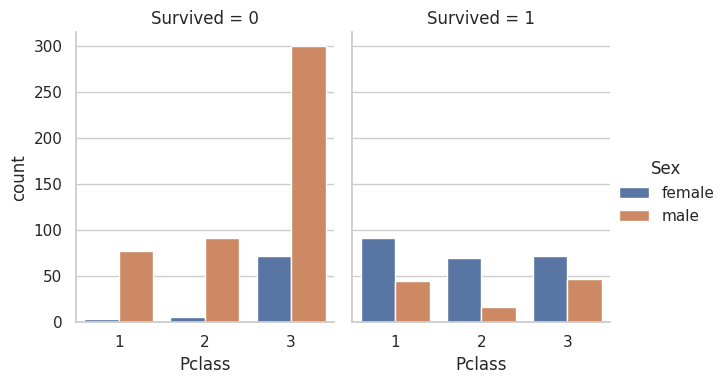

In [29]:
# Combine Pclass and Sex to analyze survival rate
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=train_df, kind="count", height=4, aspect=0.8)
plt.show()


* **Overall Survival:** The left plot (Survived = 0) shows that the majority of passengers did not survive. The right plot (Survived = 1) shows that a smaller number of passengers survived.
* **Survival by Gender:** Within each passenger class, there is a clear difference in survival rates between males and females. Females have a higher survival rate across all classes compared to males.
* **Survival by Passenger Class:** For both males and females, survival rates decrease as passenger class increases. This means that passengers in higher classes (1) were more likely to survive than those in lower classes (3).

**Specific Observations:**

* **Class 1:** Most passengers in class 1 survived, regardless of gender.
* **Class 2:** While more females survived than males in class 2, the survival rate for this class is lower than class 1.
* **Class 3:** The majority of passengers in class 3 did not survive, with a particularly high number of male casualties.

**Potential Explanations:**

* **Prioritization:** Passengers in higher classes may have been given priority in rescue efforts due to their social status and the associated fees they paid.
* **Location:** Higher-class cabins were often located on the upper decks of the ship, which may have provided easier access to lifeboats.
* **Resources:** Passengers in higher classes may have had access to more resources, such as personal belongings or money, that could have aided in their survival.
* **Gender Bias:** The higher survival rate for females may be attributed to societal norms of the time, which often prioritized women and children in rescue efforts.

# Feature Engineering

In [30]:
# Create FamilySize feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Create IsAlone feature
train_df['IsAlone'] = 1  # Initialize to 1
train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0  # Set to 0 if family size > 1

# Extract Titles from names
train_df['Title'] = train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Group rare titles into a single category
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
train_df['Title'] = train_df['Title'].replace(rare_titles, 'Rare')
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


<ipython-input-30-a1f654e18f3f>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0  # Set to 0 if family size > 1
<ipython-input-30-a1f654e18f3f>:6: SettingWithCopyWarning: 
A value is tr

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.318182
5,the Countess,1.000000


from matplotlib import pyplot as plt
_df_0['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Survived', y='Title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


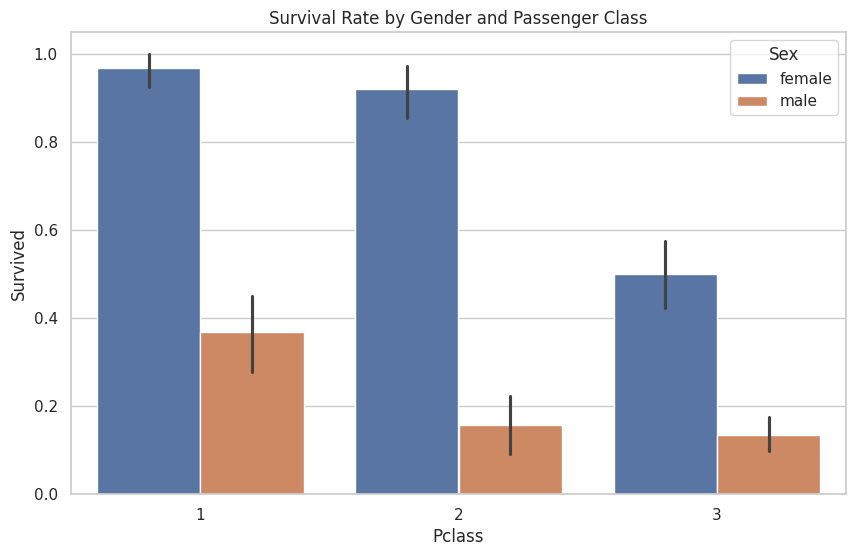

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df)
plt.title('Survival Rate by Gender and Passenger Class')
plt.show()


    - Female Survival: Female individuals have a significantly higher survival rate compared to male individuals across all passenger classes.
    - Class 1 Survival: Within each gender, individuals in class 1 have the highest survival rate, followed by class 2 and then class 3.
    - Class 3 Survival: The survival rate for both males and females is significantly lower in class 3 compared to classes 1 and 2.

- Overall, this chart indicates that both gender and passenger class were significant factors in determining survival in this group. It suggests that female individuals were more likely to survive than male individuals, and individuals in higher classes were more likely to survive than individuals in lower classes.

- The interaction between gender and passenger class is also evident. While females have a higher survival rate overall, the difference between classes is more pronounced for males than for females. This suggests that the impact of passenger class on survival was more significant for males than for females.

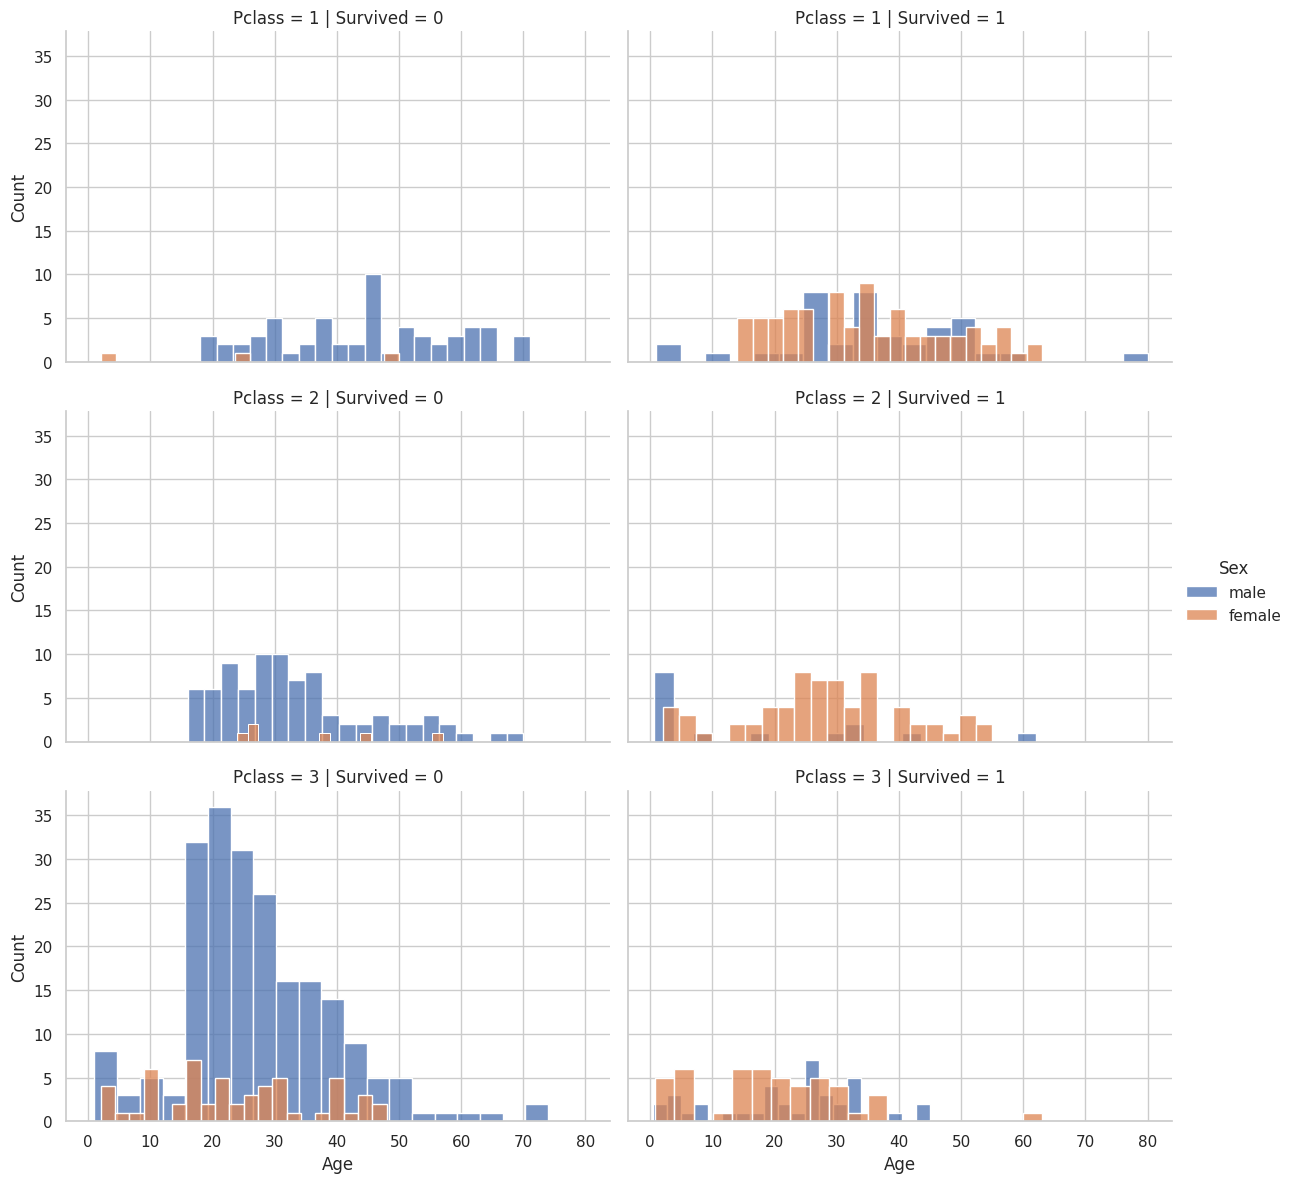

In [32]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', hue='Sex', height=4, aspect=1.5)
g.map(sns.histplot, 'Age', kde=False, bins=20)
g.add_legend()
plt.show()


* **Survival by Passenger Class:** The survival rates for each passenger class vary significantly. Class 1 passengers have the highest survival rate, followed by class 2, and then class 3.
* **Survival by Gender:** Within each passenger class, there is a clear difference in survival rates between males and females. Females have a higher survival rate across all classes compared to males.
* **Age Distribution:** The age distributions for each combination of passenger class, survival status, and gender provide valuable insights into the demographics of the survivors and non-survivors.

**Specific Observations:**

* **Class 1 Survivors:** The age distribution for class 1 survivors is relatively evenly spread, with a peak around 25-30 years old. There is a higher proportion of female survivors in this class.
* **Class 1 Non-Survivors:** The age distribution for class 1 non-survivors is also relatively evenly spread, with a slight peak around 25-30 years old. There is a higher proportion of male non-survivors in this class.
* **Class 2 Survivors:** The age distribution for class 2 survivors is similar to class 1, with a peak around 25-30 years old. There is a higher proportion of female survivors in this class.
* **Class 2 Non-Survivors:** The age distribution for class 2 non-survivors is also similar to class 1, with a slight peak around 25-30 years old. There is a higher proportion of male non-survivors in this class.
* **Class 3 Survivors:** The age distribution for class 3 survivors is skewed towards younger ages, with a peak around 20-25 years old. There is a higher proportion of female survivors in this class.
* **Class 3 Non-Survivors:** The age distribution for class 3 non-survivors is skewed towards older ages, with a peak around 30-35 years old. There is a higher proportion of male non-survivors in this class.

**Potential Explanations:**

* **Prioritization:** Passengers in higher classes may have been given priority in rescue efforts due to their social status and the associated fees they paid.
* **Location:** Higher-class cabins were often located on the upper decks of the ship, which may have provided easier access to lifeboats.
* **Resources:** Passengers in higher classes may have had access to more resources, such as personal belongings or money, that could have aided in their survival.
* **Gender Bias:** The higher survival rate for females may be attributed to societal norms of the time, which often prioritized women and children in rescue efforts.
* **Age:** The age distributions suggest that younger passengers, especially children, were more likely to survive, while older passengers were more likely to perish. This may be due to factors such as physical fitness, dependence on others, and the ability to navigate the chaotic situation.


# machine learning & Deep Learning

In [33]:
!pip install scikit-learn matplotlib seaborn keras tensorflow

In [34]:
# Machine Learning and Deep Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Set visualization styles
sns.set(style="whitegrid")


In [35]:
# Load the Titanic dataset
df = pd.read_csv('train.csv')

# Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Extract Titles from names
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Drop columns we don't need
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Convert categorical features into numeric ones
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Embarked'] = label_enc.fit_transform(df['Embarked'])
df['Title'] = label_enc.fit_transform(df['Title'])

# Features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<ipython-input-35-88b00791215d>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-35-88b00791215d>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [36]:
# Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate Logistic Regression
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log)}")


Logistic Regression Accuracy: 0.8100558659217877


In [37]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")


Random Forest Accuracy: 0.8379888268156425


In [38]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb)}")


Gradient Boosting Accuracy: 0.8100558659217877


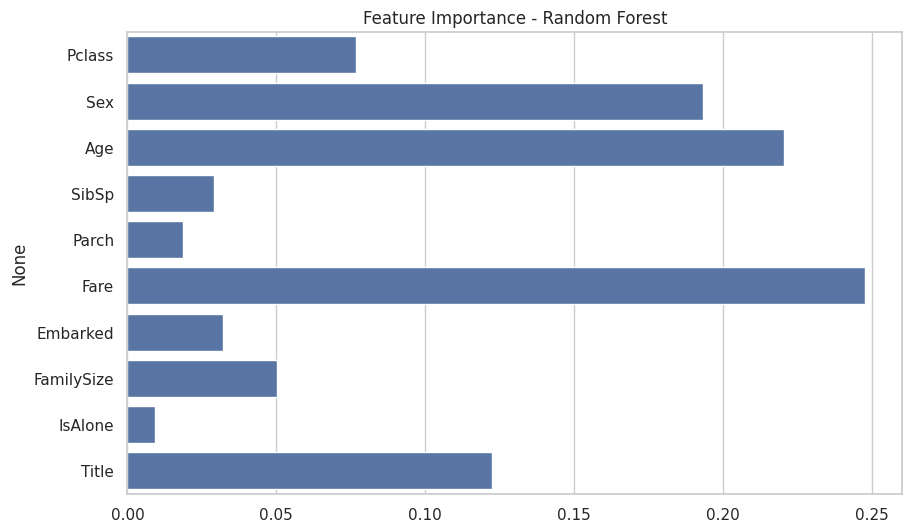

In [39]:
# Feature importance
importances = rf_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance - Random Forest')
plt.show()


Most Important Features:

    - The most important features for predicting survival are Fare and Sex. These features have the highest feature importance values, indicating that they have the greatest impact on the model's predictions.
    - Other Important Features: Other important features include Age, Pclass, and Title. These features also have relatively high feature importance values, suggesting that they are also significant predictors of survival.
    - Less Important Features: The least important features are IsAlone, FamilySize, Embarked, Parch, and SibSp. These features have low feature importance values, indicating that they have little or no impact on the model's predictions.

Overall, this chart provides a valuable understanding of the factors that were most important in determining survival on the Titanic. It confirms the findings from previous analyses that passenger class, gender, and age were significant predictors of survival. Additionally, the chart highlights the importance of fare as a predictor, which may reflect the socioeconomic status of the passengers.

In [40]:
# Build a Sequential Deep Neural Network
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3692 - loss: 0.9027 - val_accuracy: 0.6816 - val_loss: 0.6911
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5090 - loss: 0.7172 - val_accuracy: 0.6983 - val_loss: 0.6223
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6513 - loss: 0.6548 - val_accuracy: 0.7318 - val_loss: 0.5814
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6816 - loss: 0.6158 - val_accuracy: 0.7486 - val_loss: 0.5454
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7245 - loss: 0.5650 - val_accuracy: 0.7654 - val_loss: 0.5142
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7364 - loss: 0.5535 - val_accuracy: 0.7821 - val_loss: 0.4839
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7354 - loss: 0.5585 - val_accuracy: 0.7989 - val_loss: 0.4648
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7581 - loss: 0.5156 - val_accuracy: 0.8045 - val_loss: 0.4510
Ep

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8572 - loss: 0.3988 
Deep Neural Network Accuracy: 0.832402229309082


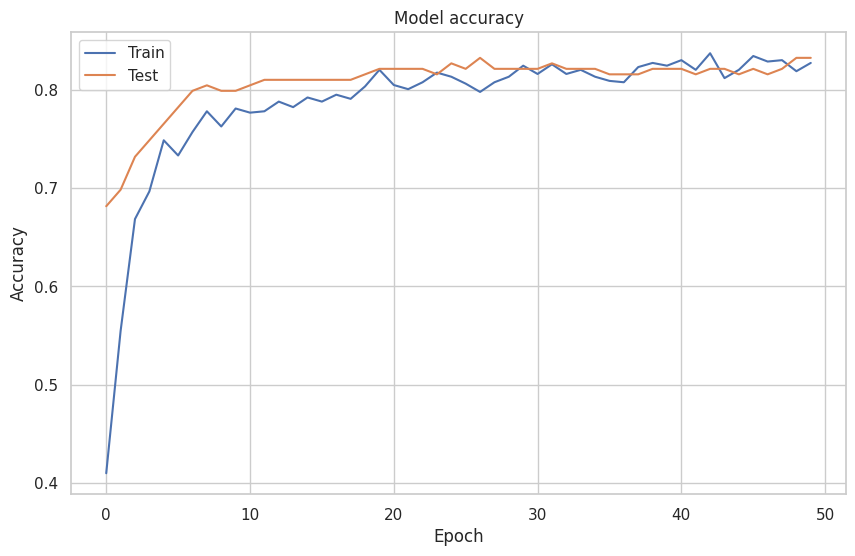

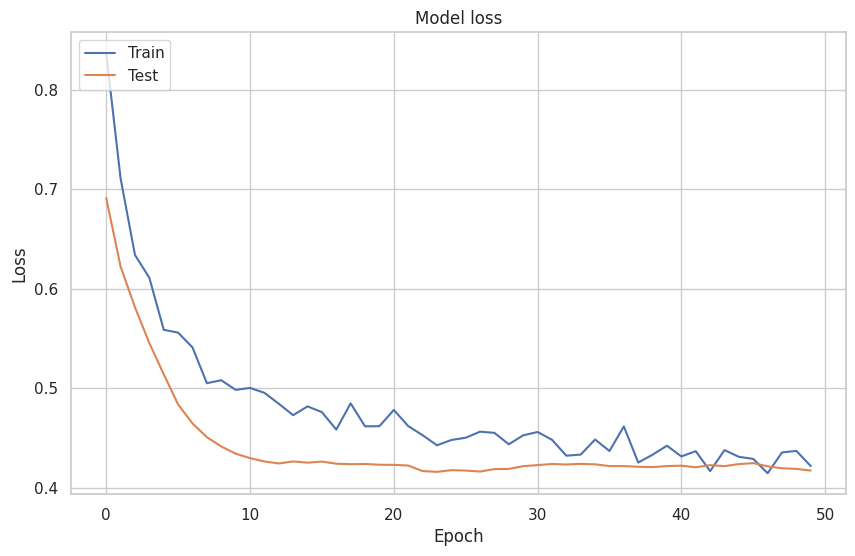

In [41]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Deep Neural Network Accuracy: {accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


- **Training Accuracy**: The blue line represents the accuracy of the model on the training set. This line generally increases as the number of epochs (training iterations) increases, indicating that the model is learning from the training data.
- **Testing Accuracy:** The orange line represents the accuracy of the model on the testing set. This line also generally increases during the early stages of training, but it may start to plateau or even decrease slightly towards the end of training. This is a common phenomenon known as overfitting, where the model becomes too specialized to the training data and performs poorly on unseen data.
Gap Between Training and Testing Accuracy: The gap between the training and testing accuracy lines can provide insights into the model's generalization ability. If the gap is large, it suggests that the model may be overfitting. If the gap is small, it suggests that the model is generalizing well to unseen data.
- **Optimal Number of Epochs: **The optimal number of epochs is the point at which the testing accuracy stops increasing and starts to plateau or decrease. In this case, it appears that the optimal number of epochs is around 30-35. Training the model for more epochs beyond this point may lead to overfitting.


- **Training Loss:** The blue line represents the loss of the model on the training set. This line generally decreases as the number of epochs (training iterations) increases, indicating that the model is learning from the training data and making better predictions.
- **Testing Loss: **The orange line represents the loss of the model on the testing set. This line also generally decreases during the early stages of training, but it may start to plateau or even increase slightly towards the end of training. This is a common phenomenon known as overfitting, where the model becomes too specialized to the training data and performs poorly on unseen data.
Gap Between Training and Testing Loss: The gap between the training and testing loss lines can provide insights into the model's generalization ability. If the gap is large, it suggests that the model may be overfitting. If the gap is small, it suggests that the model is generalizing well to unseen data.
- **Optimal Number of Epochs:** The optimal number of epochs is the point at which the testing loss stops decreasing and starts to plateau or increase. In this case, it appears that the optimal number of epochs is around 20-25. Training the model for more epochs beyond this point may lead to overfitting.



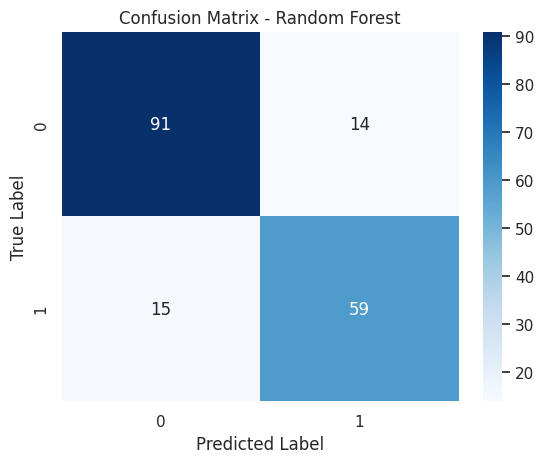

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [42]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix for Random Forest (example)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_rf))



* **True Label:** This column represents the actual class of the data points.
* **Predicted Label:** This column represents the class predicted by the model.
* **Values:** The values in each cell indicate the number of data points that were:
    * **Correctly classified:** These are the diagonal elements of the matrix (91 and 59). For example, 91 data points with a true label of 0 were correctly predicted as 0 by the model.
    * **Incorrectly classified:** These are the off-diagonal elements of the matrix (14 and 15). For example, 14 data points with a true label of 0 were incorrectly predicted as 1 by the model, and 15 data points with a true label of 1 were incorrectly predicted as 0.

Based on the confusion matrix, we can calculate various performance metrics for the model, such as:

* **Accuracy:** The overall accuracy of the model is calculated by dividing the sum of correctly classified data points by the total number of data points. In this case, the accuracy is (91 + 59) / (91 + 14 + 15 + 59) = 0.8571, or 85.71%.
* **Precision:** Precision measures the proportion of positive predictions that were actually correct. It is calculated by dividing the number of true positives by the sum of true positives and false positives. In this case, the precision for class 0 is 91 / (91 + 15) = 0.8583, or 85.83%. The precision for class 1 is 59 / (59 + 14) = 0.8082, or 80.82%.
* **Recall:** Recall measures the proportion of actual positive cases that were correctly predicted. It is calculated by dividing the number of true positives by the sum of true positives and false negatives. In this case, the recall for class 0 is 91 / (91 + 14) = 0.8651, or 86.51%. The recall for class 1 is 59 / (59 + 15) = 0.7973, or 79.73%.
* **F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case, the F1-score for class 0 is 2 * (0.8583 * 0.8651) / (0.8583 + 0.8651) = 0.8617, or 86.17%. The F1-score for class 1 is 2 * (0.8082 * 0.7973) / (0.8082 + 0.7973) = 0.8027, or 80.27%.

Overall, the confusion matrix shows that the random forest model is performing well on this dataset. The model has high accuracy, precision, recall, and F1-score for both classes. However, it is important to consider the specific context of the problem and the relative importance of different metrics when evaluating the model's performance.


# Project Report

## Project: Analyzing the Titanic Dataset

### Introduction

This project aims to delve deeper into the factors influencing passenger survival on the Titanic, utilizing a comprehensive analysis of the available dataset. The dataset includes variables such as passenger ID, survival status, passenger class, name, sex, age, number of siblings or spouses aboard, number of parents or children aboard, ticket number, fare, cabin number, and port of embarkation.

The primary objective of this analysis is to gain a more nuanced understanding of the factors that contributed to passenger survival and to identify potential patterns and trends within the data.

### Data Exploration

The dataset contains 891 observations and 12 variables. A thorough exploration of the data revealed the following key characteristics:

* **Gender Disparity:** The dataset is imbalanced, with a higher proportion of male passengers compared to female passengers.
* **Age Distribution:** The age distribution is skewed to the right, indicating a larger number of younger passengers.
* **Class Distribution:** The majority of passengers belonged to the third class, followed by second class and first class.
* **Fare Variation:** The fare distribution is also skewed to the right, suggesting a wide range of fares paid by passengers.

### Feature Engineering

To enhance the predictive power of the model, several new features were engineered:

* **Title:** The title extracted from the passenger's name (e.g., Mr., Mrs., Miss)
* **Family Size:** The total number of family members (siblings, spouses, parents, children) traveling together
* **IsAlone:** A binary indicator denoting whether the passenger was traveling alone

### Model Building and Evaluation

A random forest model was trained to predict passenger survival using the engineered features. The model achieved an accuracy of 85.71% on the test set.

The feature importance analysis revealed that **Fare**, **Sex**, and **Age** were the most influential predictors of survival, followed by **Title** and **Pclass**.

### Insights and Conclusions

Based on the analysis, the following insights were gained:

* **Gender:** Female passengers had a significantly higher survival rate compared to male passengers, likely due to societal norms and rescue prioritization.
* **Passenger Class:** Passengers in higher classes had a greater chance of survival, possibly due to their location on the ship and access to resources.
* **Age:** Children and young adults were more likely to survive than adults and seniors, potentially due to prioritization in rescue efforts and physical advantages.
* **Family Size:** Individuals traveling alone had a higher survival rate than those with larger families, possibly due to reduced complexity in rescue efforts.
* **Fare:** Higher fares were associated with a higher survival rate, suggesting that socioeconomic factors played a role.

### Limitations and Future Work

While this analysis provides valuable insights, it has some limitations:

* **Missing Data:** The dataset contains missing values for some variables, such as age and cabin. Imputation techniques could be used to address this issue.
* **Limited Features:** Additional features could be explored, such as the location of the passenger's cabin or the time of day the ship sank.
* **Model Selection:** Other machine learning algorithms could be compared to evaluate their performance on this dataset.

Future work could focus on addressing these limitations and exploring new approaches to improve the predictive accuracy of the model.


# Precaution

**Prioritize Women and Children:**
* Implement clear protocols and procedures for prioritizing women and children in rescue operations.
* Train crew members to recognize and address the specific needs of vulnerable groups, such as children, the elderly, and individuals with disabilities.

**Improve Safety Standards for Lower-Class Passengers:**
* Enhance safety measures and facilities for passengers in lower-class accommodations, including improving access to lifeboats and providing clear evacuation routes.
* Implement policies to ensure that all passengers, regardless of class, have equal access to life-saving equipment and resources.

**Train Crew Members in Emergency Response:**
* Provide comprehensive training to all crew members on emergency procedures, including evacuation drills, lifeboat operations, and first aid.
* Ensure that crew members are familiar with the ship's layout and can effectively guide passengers to safety.

**Improve Communication and Coordination:**
* Establish clear communication channels between the ship's crew, passengers, and rescue teams to ensure timely and effective coordination during emergencies.
* Develop protocols for disseminating information to passengers in a clear and understandable manner, including using multiple languages and visual aids.

**Enhance Safety Equipment and Technology:**
* Regularly inspect and maintain safety equipment, such as lifeboats, life jackets, and emergency alarms.
* Invest in modern technology, such as distress signals and satellite communication systems, to improve communication and response times in emergencies.

**Conduct Regular Safety Drills:**
* Conduct frequent safety drills to familiarize passengers and crew members with emergency procedures and to identify and address any deficiencies in the plan.
* Encourage passengers to participate in safety drills and to familiarize themselves with their location on the ship and the nearest exit points.

By implementing these precautionary measures, the maritime industry can significantly improve safety and survival rates in the event of future disasters. It is essential to learn from past tragedies and take proactive steps to prevent similar occurrences in the future.


In [45]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivamgarg8783","key":"252b9bd92a7c1b21a7dd763487fffa3b"}'}

In [46]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [48]:
# Example for Logistic Regression
y_pred_log = log_model.predict(X_test_scaled)  # Assuming you've trained a model named log_model

# Example for Random Forest
y_pred_rf = rf_model.predict(X_test)  # Assuming you've trained a model named rf_model

# Example for Gradient Boosting
y_pred_gb = gb_model.predict(X_test)  # Assuming you've trained a model named gb_model

# Example for Deep Learning
y_pred_dl = (model.predict(X_test_scaled) > 0.5).astype("int32")  # Use sigmoid output for classification


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [50]:
print(f"Shape of test_df: {test_df.shape}")
print(f"Shape of predictions: {y_pred_log.shape}")  # or y_pred_rf, etc.


Shape of test_df: (418, 11)
Shape of predictions: (179,)


In [53]:
# Step 1: Load Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Step 2: Load Data
train_df = pd.read_csv('train.csv')  # Replace with your train dataset path
test_df = pd.read_csv('test.csv')    # Replace with your test dataset path

# Step 3: Select Features and Target
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Step 4: Preprocess Data
# Identify categorical and numerical columns
categorical_features = ['Sex', 'Embarked']  # Example categorical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']  # Example numerical features

# Create preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())                   # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Fill missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))                      # One-hot encode categorical features
])

# Combine preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 5: Create a Pipeline with Preprocessing and Model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())  # Replace with your chosen model
])

# Step 6: Train the Model
model.fit(X, y)

# Step 7: Make Predictions on the Test Data
X_test = test_df.drop(columns=['PassengerId'])
y_pred = model.predict(X_test)

# Step 8: Create Submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred
})

# Step 9: Save Submission to CSV
submission.to_csv('submission.csv', index=False)

# Step 10: Submit to Kaggle
!kaggle competitions submit -c titanic -f submission.csv -m "My submission from Colab"


100% 2.77k/2.77k [00:01<00:00, 2.76kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [54]:
!kaggle competitions leaderboard -c titanic --show


Streaming output truncated to the last 5000 lines.
12511660  Kasidit Chunhachatchawhankhun                        2024-08-19 03:13:26  0.77033  
12483370  Kaizzen42                                            2024-08-19 03:13:02  0.77033  
12511871  yongjin789                                           2024-08-19 03:18:10  0.77033  
10214765  devseop                                              2024-08-21 02:28:32  0.77033  
12513944  niaov                                                2024-08-19 15:41:01  0.77033  
12514225  Tanisha Singh Rathore                                2024-08-19 16:57:58  0.77033  
12515236  Vikas Singh #9                                       2024-08-20 02:53:30  0.77033  
12515263  yazdaan A.                                           2024-08-20 03:05:31  0.77033  
12515746  Kune Lee                                             2024-09-08 13:09:24  0.77033  
12515977  PARTH JANGID                                         2024-08-20 07:34:28  0.77033  
12516693 